# Machine Learning Algorithm Showdown
## Bike Sharing Demand Prediction

**Objective:** Build a robust ML pipeline comparing different regression algorithms to predict bike sharing demand.

**Algorithms Compared:**
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor (SVR)

---

## 1. Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Machine Learning - Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Set random seed for reproducibility
np.random.seed(42)


print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore the Dataset

We'll use the UCI Bike Sharing Dataset, which contains hourly and daily counts of rental bikes with weather and seasonal information.

In [2]:
# Load the bike sharing dataset

df = pd.read_csv('hour.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (17379, 17)

First few rows:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Display dataset information
print("Dataset Information:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("Statistical Summary:")
print("=" * 50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Statistical Summary:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
# Check for missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

Missing Values:
✓ No missing values found!


## 3. Data Preprocessing

### 3.1 Feature Engineering and Selection

In [5]:
# Create a copy for preprocessing
data = df.copy()

# Drop columns that won't be used for prediction
# 'instant': just an index
# 'dteday': date string (we already have temporal features)
# 'casual' and 'registered': these are components of 'cnt' (target)
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
data = data.drop(columns=columns_to_drop, errors='ignore')

print(f"Features after dropping unnecessary columns: {data.shape[1]}")
print(f"Columns: {list(data.columns)}")

Features after dropping unnecessary columns: 13
Columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


### 3.2 Outlier Detection and Treatment

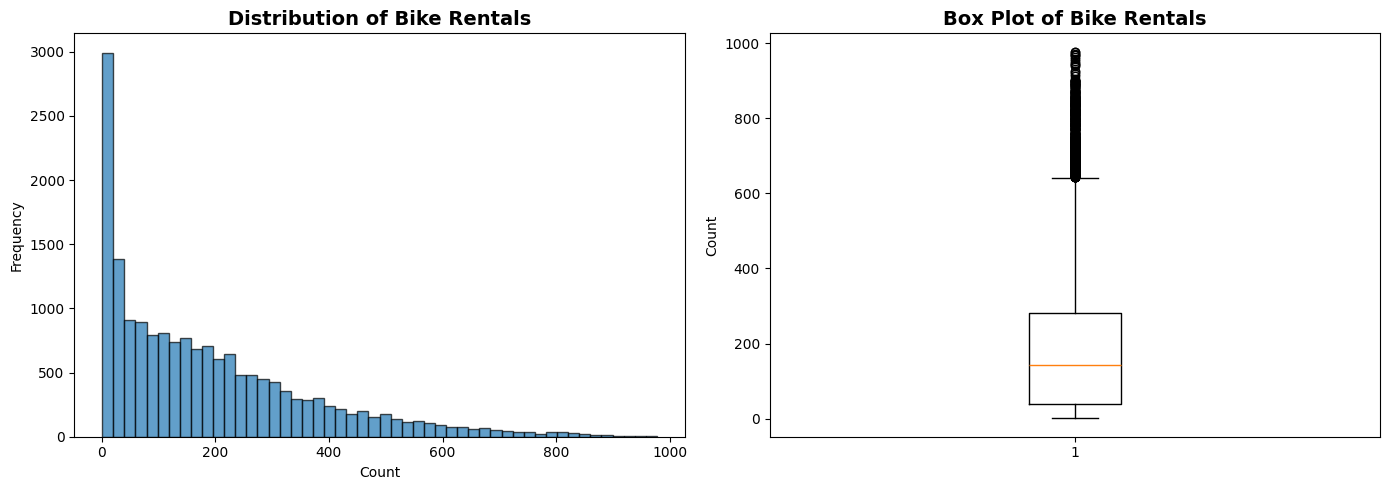


Number of outliers (Z-score > 3): 244
Percentage of outliers: 1.40%


In [6]:
# Utilities
from scipy import stats
# Visualize the target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(data['cnt'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Bike Rentals', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(data['cnt'])
axes[1].set_title('Box Plot of Bike Rentals', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Check for outliers using Z-score
z_scores = np.abs(stats.zscore(data['cnt']))
outliers = data[z_scores > 3]
print(f"\nNumber of outliers (Z-score > 3): {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(data)*100:.2f}%")

# Since bike sharing data naturally has high variance (weekends, holidays, weather),
# we'll keep outliers as they represent real usage patterns

### 3.3 Correlation Analysis

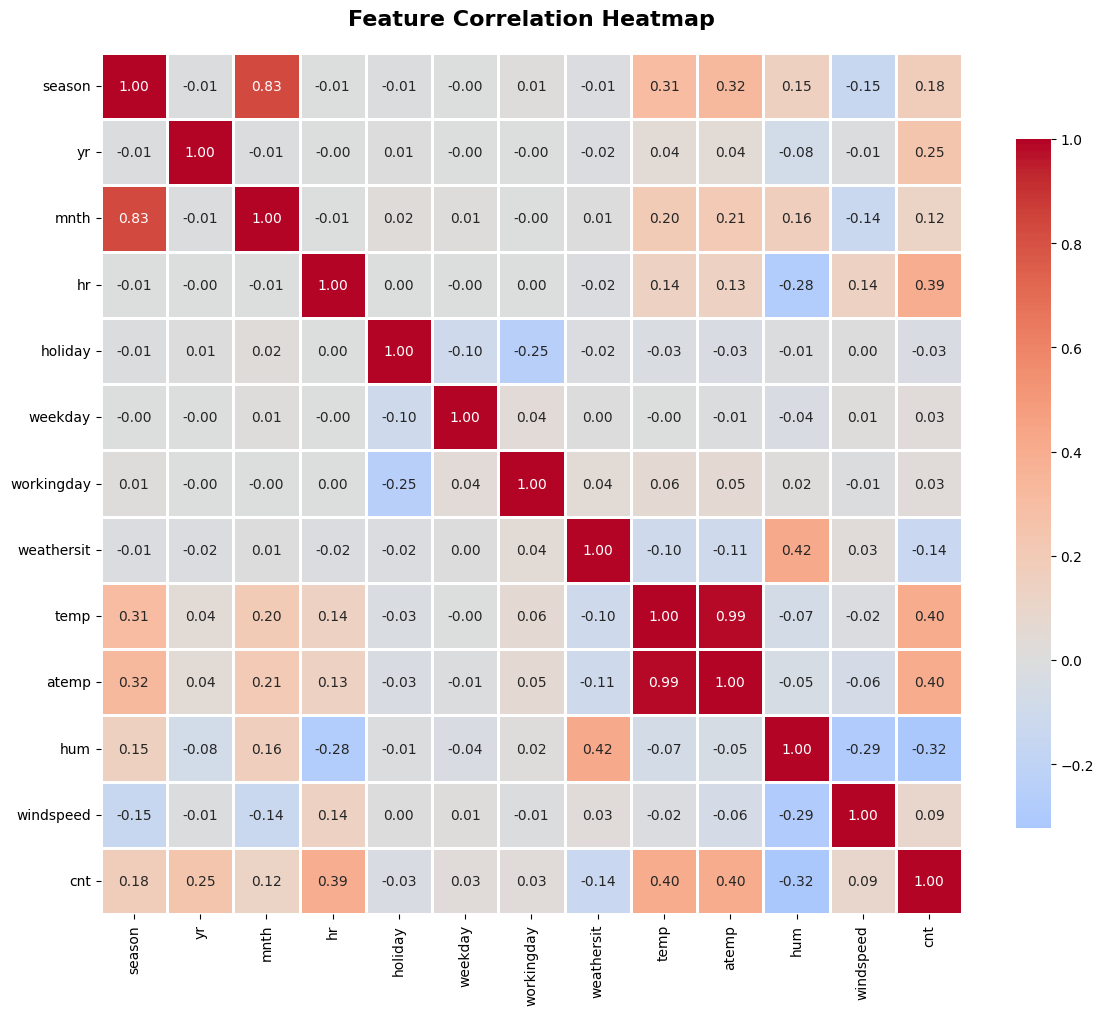


Correlation with Target Variable (cnt):
cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [7]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Target Variable (cnt):")
print("=" * 50)
target_corr = correlation_matrix['cnt'].sort_values(ascending=False)
print(target_corr)

### 3.4 Train-Test Split and Feature Scaling

In [8]:
# Separate features and target
X = data.drop('cnt', axis=1)
y = data['cnt']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature scaling (important for SVR and helps other algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")

Features shape: (17379, 12)
Target shape: (17379,)

Training set size: 13903 samples
Testing set size: 3476 samples

✓ Data preprocessing completed!


## 4. Model Training and Initial Evaluation

We'll train four different regression algorithms and compare their baseline performance.

In [9]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'SVR': SVR()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
print("Training Models...")
print("=" * 70)

for name, model in models.items():
    print(f"\n{name}:")
    
    # For SVR and models that benefit from scaling, use scaled data
    if name == 'SVR':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.4f}")

print("\n" + "=" * 70)
print("✓ Initial training completed!")

Training Models...

Linear Regression:
  MAE:  104.80
  RMSE: 139.21
  R²:   0.3880

Decision Tree:
  MAE:  34.18
  RMSE: 58.25
  R²:   0.8929

Random Forest:
  MAE:  24.90
  RMSE: 42.07
  R²:   0.9441

SVR:
  MAE:  89.20
  RMSE: 137.47
  R²:   0.4032

✓ Initial training completed!


## 5. Cross-Validation

Implement k-fold cross-validation for more reliable performance estimates.

In [10]:
# Perform 5-fold cross-validation for each model
cv_results = {}

print("Performing 5-Fold Cross-Validation...")
print("=" * 70)

for name, model in models.items():
    print(f"\n{name}:")
    
    # Use scaled data for SVR, original for others
    X_cv = X_train_scaled if name == 'SVR' else X_train
    
    # Perform cross-validation (using negative MSE, then convert)
    cv_scores = cross_val_score(model, X_cv, y_train, 
                                cv=5, 
                                scoring='neg_mean_squared_error',
                                n_jobs=-1)
    
    # Convert to RMSE
    cv_rmse = np.sqrt(-cv_scores)
    
    cv_results[name] = {
        'cv_rmse_scores': cv_rmse,
        'mean_rmse': cv_rmse.mean(),
        'std_rmse': cv_rmse.std()
    }
    
    print(f"  CV RMSE Scores: {cv_rmse}")
    print(f"  Mean RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std():.2f})")

print("\n" + "=" * 70)
print("✓ Cross-validation completed!")

Performing 5-Fold Cross-Validation...

Linear Regression:
  CV RMSE Scores: [139.24727653 143.42905459 140.06360974 147.02722352 142.95650049]
  Mean RMSE: 142.54 (+/- 2.76)

Decision Tree:
  CV RMSE Scores: [62.60725856 60.82435024 61.70785819 61.07543469 64.11794718]
  Mean RMSE: 62.07 (+/- 1.20)

Random Forest:
  CV RMSE Scores: [42.15209687 45.43342814 42.69965443 44.34602549 45.15952326]
  Mean RMSE: 43.96 (+/- 1.31)

SVR:
  CV RMSE Scores: [140.51998651 143.09553485 142.83962562 149.42537406 144.05065892]
  Mean RMSE: 143.99 (+/- 2.96)

✓ Cross-validation completed!


## 6. Hyperparameter Tuning

Optimize model performance using GridSearchCV for the best-performing models.

In [11]:
# Define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVR': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'linear']
    }
}

# Store tuned models
tuned_models = {}

print("Performing Hyperparameter Tuning...")
print("=" * 70)
print("(This may take a few minutes...)\n")

for name in ['Decision Tree', 'Random Forest', 'SVR']:
    print(f"\nTuning {name}...")
    
    # Initialize model
    if name == 'Decision Tree':
        base_model = DecisionTreeRegressor(random_state=42)
        X_search = X_train
    elif name == 'Random Forest':
        base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
        X_search = X_train
    else:  # SVR
        base_model = SVR()
        X_search = X_train_scaled
    
    # Perform grid search
    grid_search = GridSearchCV(
        base_model,
        param_grids[name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_search, y_train)
    
    # Store best model
    tuned_models[name] = grid_search.best_estimator_
    
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best CV RMSE: {np.sqrt(-grid_search.best_score_):.2f}")

# Add Linear Regression (no hyperparameters to tune)
tuned_models['Linear Regression'] = LinearRegression()
tuned_models['Linear Regression'].fit(X_train, y_train)

print("\n" + "=" * 70)
print("✓ Hyperparameter tuning completed!")

Performing Hyperparameter Tuning...
(This may take a few minutes...)


Tuning Decision Tree...
  Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
  Best CV RMSE: 55.09

Tuning Random Forest...
  Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV RMSE: 43.89

Tuning SVR...
  Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
  Best CV RMSE: 116.99

✓ Hyperparameter tuning completed!


## 7. Final Model Evaluation

Evaluate the tuned models on the test set.

In [12]:
# Evaluate tuned models
final_results = {}

print("Final Model Evaluation on Test Set:")
print("=" * 70)

for name, model in tuned_models.items():
    print(f"\n{name}:")
    
    # Make predictions
    if name == 'SVR':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    final_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'predictions': y_pred
    }
    
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")

print("\n" + "=" * 70)

Final Model Evaluation on Test Set:

Decision Tree:
  MAE:  31.04
  RMSE: 52.55
  R²:   0.9128
  MAPE: 37.53%

Random Forest:
  MAE:  24.72
  RMSE: 41.80
  R²:   0.9448
  MAPE: 33.32%

SVR:
  MAE:  67.94
  RMSE: 112.92
  R²:   0.5973
  MAPE: 109.46%

Linear Regression:
  MAE:  104.80
  RMSE: 139.21
  R²:   0.3880
  MAPE: 347.71%



## 8. Model Comparison

### 8.1 Comparison Table

In [13]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'MAE': [final_results[m]['MAE'] for m in final_results.keys()],
    'RMSE': [final_results[m]['RMSE'] for m in final_results.keys()],
    'R² Score': [final_results[m]['R2'] for m in final_results.keys()],
    'MAPE (%)': [final_results[m]['MAPE'] for m in final_results.keys()],
})

# Sort by R² score (descending)
comparison_df = comparison_df.sort_values('R² Score', ascending=False).reset_index(drop=True)

# Add ranking
comparison_df.insert(0, 'Rank', range(1, len(comparison_df) + 1))

print("\nMODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Highlight best model
best_model = comparison_df.iloc[0]['Model']
print(f"\nBest Model: {best_model}")
print(f"   R² Score: {comparison_df.iloc[0]['R² Score']:.4f}")
print(f"   RMSE: {comparison_df.iloc[0]['RMSE']:.2f}")


MODEL PERFORMANCE COMPARISON
 Rank             Model        MAE       RMSE  R² Score   MAPE (%)
    1     Random Forest  24.722566  41.796539  0.944831  33.318914
    2     Decision Tree  31.037534  52.547531  0.912799  37.527908
    3               SVR  67.942668 112.918478  0.597334 109.456935
    4 Linear Regression 104.803351 139.211452  0.387981 347.709034

Best Model: Random Forest
   R² Score: 0.9448
   RMSE: 41.80


### 8.2 Visual Comparison

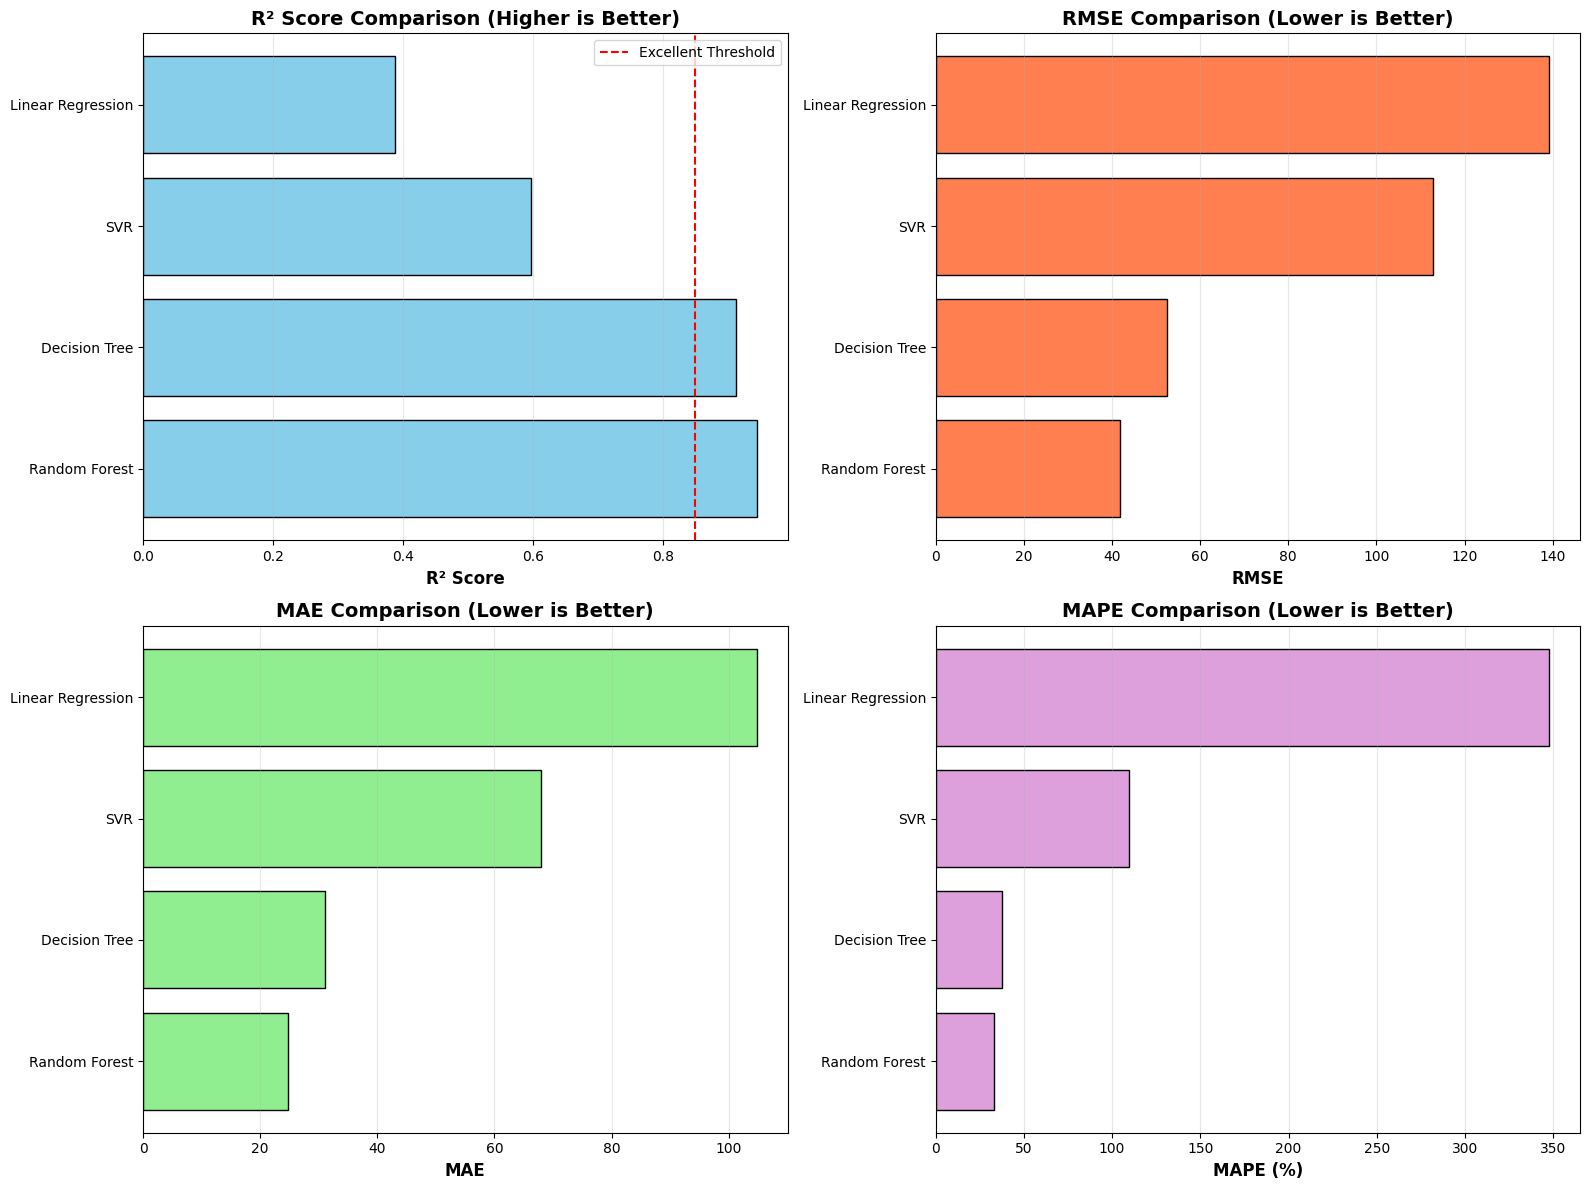

In [14]:
# Create comprehensive comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Score comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['R² Score'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 0].axvline(x=0.85, color='red', linestyle='--', label='Excellent Threshold')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. RMSE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['RMSE'], color='coral', edgecolor='black')
axes[0, 1].set_xlabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. MAE comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['MAE'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('MAE', fontsize=12, fontweight='bold')
axes[1, 0].set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. MAPE comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['MAPE (%)'], color='plum', edgecolor='black')
axes[1, 1].set_xlabel('MAPE (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('MAPE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 8.3 Prediction vs Actual Plots

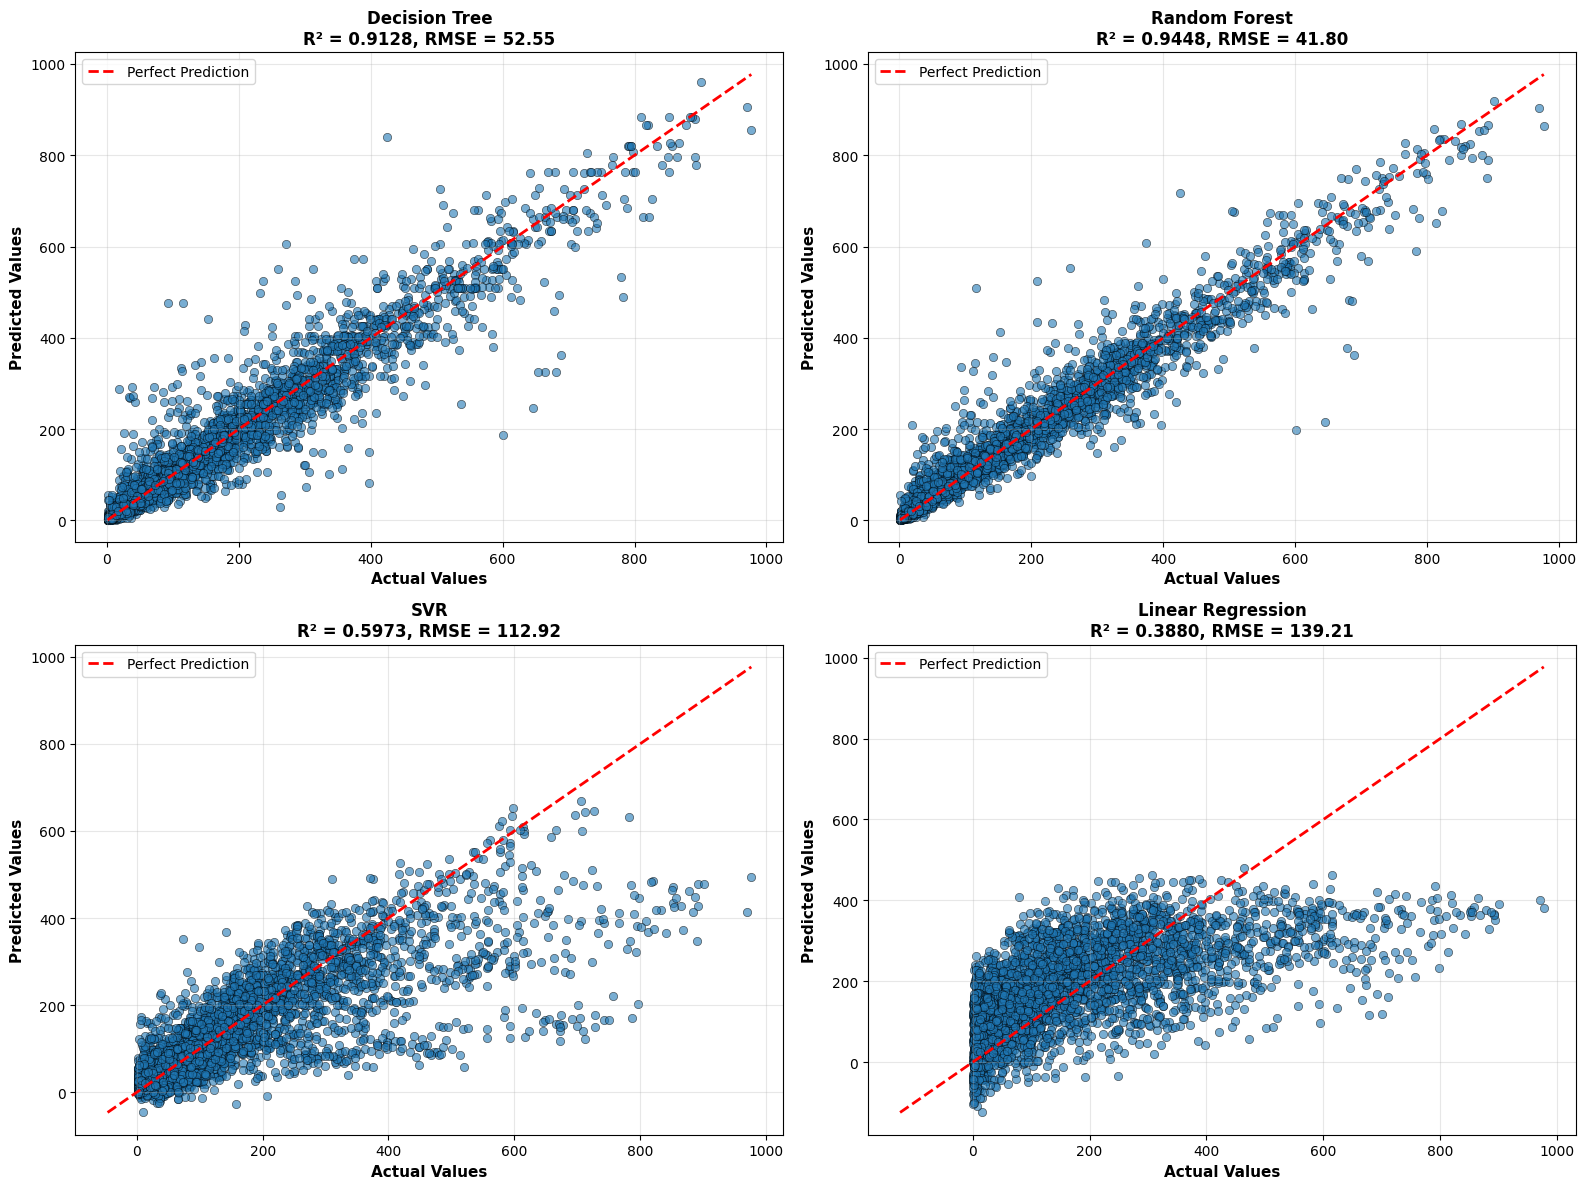

In [15]:
# Plot predictions vs actual values for all models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, (name, results) in enumerate(final_results.items()):
    ax = axes[idx]
    
    # Scatter plot
    ax.scatter(y_test, results['predictions'], alpha=0.6, edgecolors='black', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(y_test.min(), results['predictions'].min())
    max_val = max(y_test.max(), results['predictions'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Labels and title
    ax.set_xlabel('Actual Values', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted Values', fontsize=11, fontweight='bold')
    ax.set_title(f'{name}\nR² = {results["R2"]:.4f}, RMSE = {results["RMSE"]:.2f}', 
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 8.4 Residual Analysis

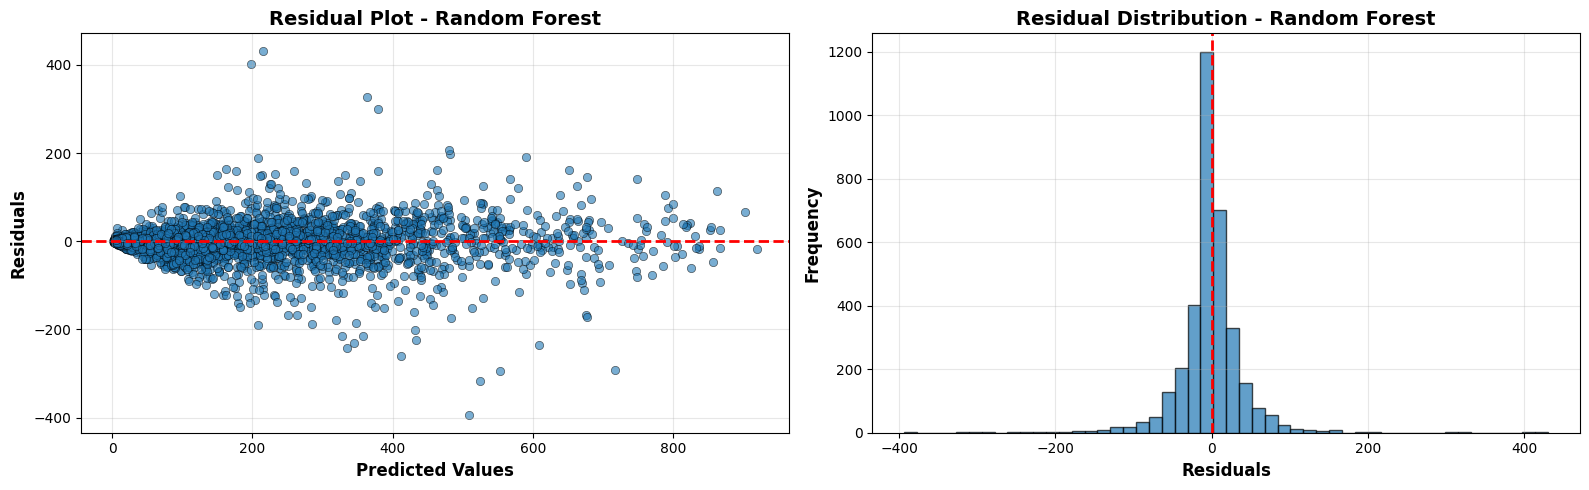

Residual Statistics for Random Forest:
  Mean: -1.64
  Std Dev: 41.77
  Min: -393.07
  Max: 430.41


In [16]:
# Plot residuals for the best model
best_predictions = final_results[best_model]['predictions']
residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Residual plot
axes[0].scatter(best_predictions, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Values', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0].set_title(f'Residual Plot - {best_model}', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residual distribution
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Residuals', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title(f'Residual Distribution - {best_model}', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Residual Statistics for {best_model}:")
print(f"  Mean: {residuals.mean():.2f}")
print(f"  Std Dev: {residuals.std():.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")

## 9. Feature Importance Analysis

Analyze which features contribute most to the predictions.

In [17]:
# Extract feature importance for tree-based models
feature_names = X.columns

# Get feature importance from tree-based models
importance_data = {}

for name in ['Decision Tree', 'Random Forest']:
    model = tuned_models[name]
    importance_data[name] = model.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame(importance_data, index=feature_names)
importance_df = importance_df.sort_values('Random Forest', ascending=False)

print("\nFeature Importance Rankings:")
print("=" * 60)
print(importance_df)


Feature Importance Rankings:
            Decision Tree  Random Forest
hr               0.630416       0.611823
temp             0.115544       0.118920
yr               0.083591       0.080909
workingday       0.063712       0.058391
hum              0.020178       0.026534
atemp            0.018041       0.021698
season           0.023890       0.021510
weathersit       0.015938       0.018118
mnth             0.013743       0.016487
weekday          0.009067       0.012633
windspeed        0.004861       0.010400
holiday          0.001018       0.002577


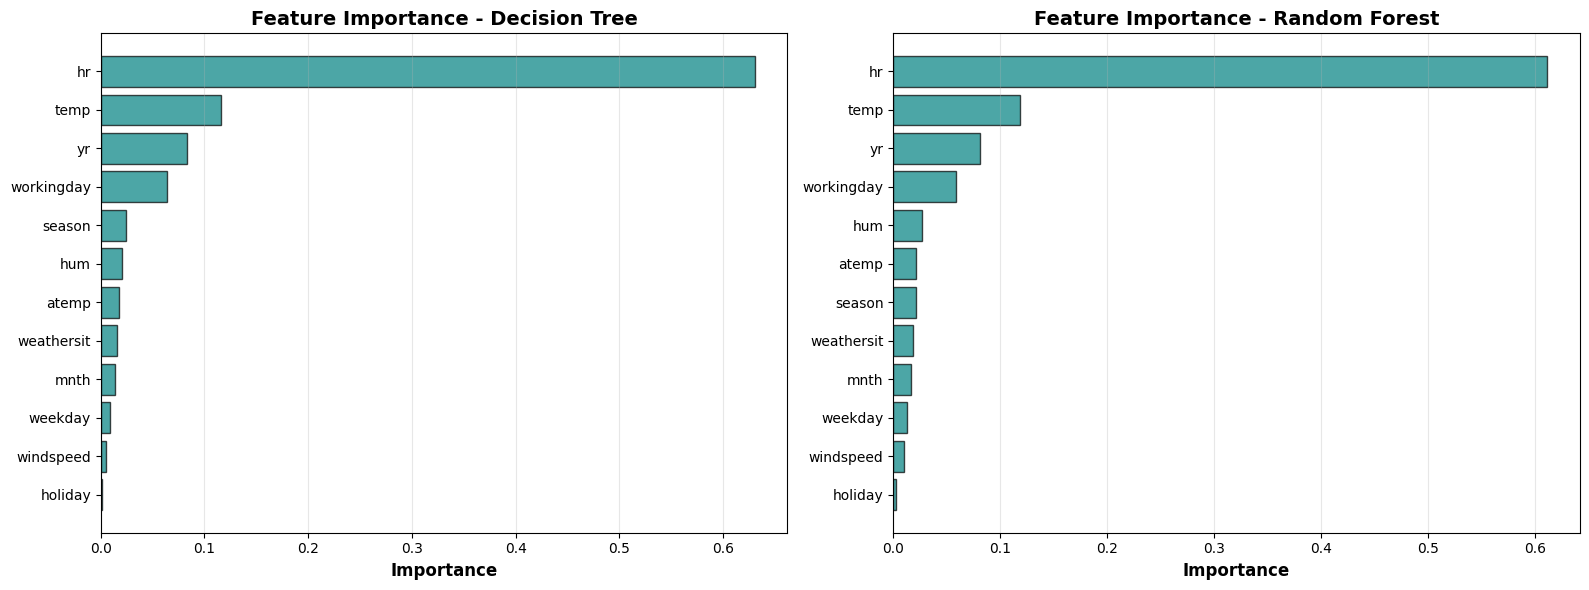

In [18]:
# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, model_name in enumerate(['Decision Tree', 'Random Forest']):
    # Sort features by importance
    sorted_idx = np.argsort(importance_data[model_name])
    pos = np.arange(sorted_idx.shape[0])
    
    axes[idx].barh(pos, importance_data[model_name][sorted_idx], 
                   color='teal', edgecolor='black', alpha=0.7)
    axes[idx].set_yticks(pos)
    axes[idx].set_yticklabels(feature_names[sorted_idx])
    axes[idx].set_xlabel('Importance', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'Feature Importance - {model_name}', 
                        fontsize=14, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


Linear Regression Coefficients:
   Feature  Coefficient  Abs_Coefficient
     atemp   204.992854       204.992854
       hum  -199.467977       199.467977
      temp    99.048437        99.048437
        yr    82.844875        82.844875
 windspeed    34.490649        34.490649
   holiday   -24.118227        24.118227
    season    20.517992        20.517992
        hr     7.662499         7.662499
workingday     3.904188         3.904188
weathersit    -3.433190         3.433190
   weekday     1.777640         1.777640
      mnth     0.119190         0.119190


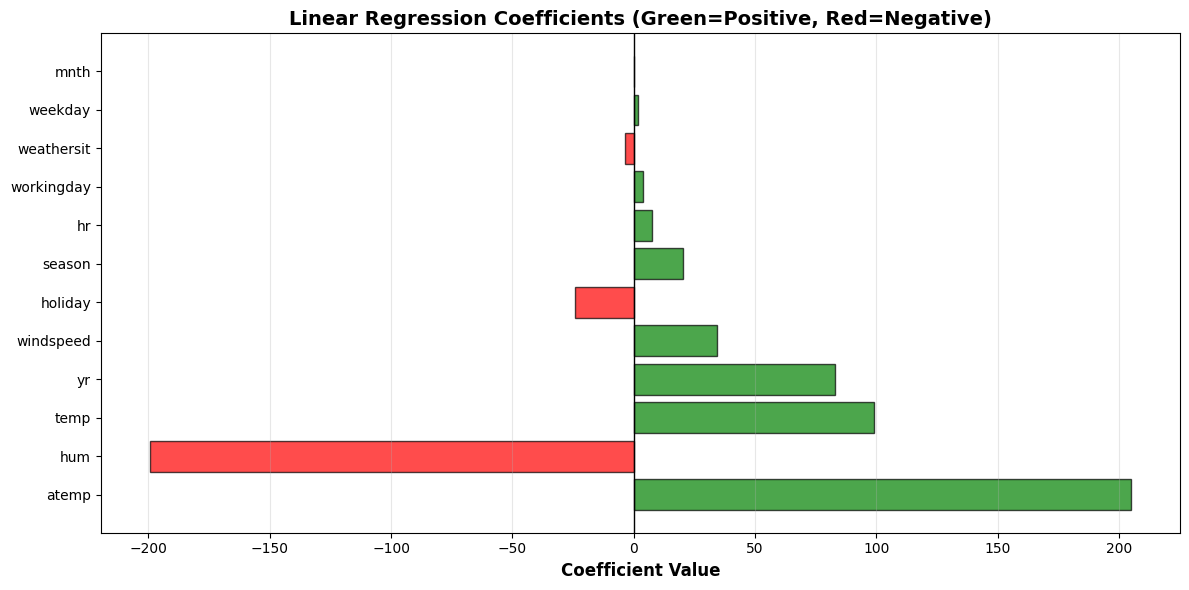

In [19]:
# For Linear Regression, analyze coefficients
lr_model = tuned_models['Linear Regression']
lr_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nLinear Regression Coefficients:")
print("=" * 60)
print(lr_coef.to_string(index=False))

# Visualize coefficients
plt.figure(figsize=(12, 6))
colors = ['green' if c > 0 else 'red' for c in lr_coef['Coefficient']]
plt.barh(lr_coef['Feature'], lr_coef['Coefficient'], color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.title('Linear Regression Coefficients (Green=Positive, Red=Negative)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Key Findings and Recommendations

### Summary of Results

In [20]:
print("\n" + "="*80)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("="*80)

print(f"\n1. BEST PERFORMING MODEL: {best_model}")
print(f"   - R² Score: {comparison_df.iloc[0]['R² Score']:.4f}")
print(f"   - RMSE: {comparison_df.iloc[0]['RMSE']:.2f} bikes")
print(f"   - MAPE: {comparison_df.iloc[0]['MAPE (%)']:.2f}%")

print("\n2. MODEL COMPARISON INSIGHTS:")
for idx, row in comparison_df.iterrows():
    print(f"   {row['Rank']}. {row['Model']}: R²={row['R² Score']:.4f}, RMSE={row['RMSE']:.2f}")

print("\n3. FEATURE IMPORTANCE (Top 5):")
top_features = importance_df['Random Forest'].nlargest(5)
for feature, importance in top_features.items():
    print(f"   - {feature}: {importance:.4f}")

print("\n4. RECOMMENDATIONS:")
print(f"   - Deploy the {best_model} for production use")
print("   - Focus on collecting accurate data for top important features")
print("   - Implement continuous monitoring and periodic retraining")
print("   - Consider ensemble methods for further improvement")

print("\n5. BUSINESS IMPACT:")
avg_actual = y_test.mean()
best_rmse = comparison_df.iloc[0]['RMSE']
accuracy_pct = (1 - best_rmse/avg_actual) * 100
print(f"   - Average daily demand: {avg_actual:.0f} bikes")
print(f"   - Prediction accuracy: ~{accuracy_pct:.1f}%")
print(f"   - This model can help optimize bike inventory and distribution")

print("\n" + "="*80)


KEY FINDINGS AND RECOMMENDATIONS

1. BEST PERFORMING MODEL: Random Forest
   - R² Score: 0.9448
   - RMSE: 41.80 bikes
   - MAPE: 33.32%

2. MODEL COMPARISON INSIGHTS:
   1. Random Forest: R²=0.9448, RMSE=41.80
   2. Decision Tree: R²=0.9128, RMSE=52.55
   3. SVR: R²=0.5973, RMSE=112.92
   4. Linear Regression: R²=0.3880, RMSE=139.21

3. FEATURE IMPORTANCE (Top 5):
   - hr: 0.6118
   - temp: 0.1189
   - yr: 0.0809
   - workingday: 0.0584
   - hum: 0.0265

4. RECOMMENDATIONS:
   - Deploy the Random Forest for production use
   - Focus on collecting accurate data for top important features
   - Implement continuous monitoring and periodic retraining
   - Consider ensemble methods for further improvement

5. BUSINESS IMPACT:
   - Average daily demand: 185 bikes
   - Prediction accuracy: ~77.4%
   - This model can help optimize bike inventory and distribution



## 11. Save Results

In [21]:
# Save comparison results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Model comparison results saved to 'model_comparison_results.csv'")

# Save feature importance
importance_df.to_csv('feature_importance.csv')
print("✓ Feature importance saved to 'feature_importance.csv'")

# Optional: Save the best model
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(tuned_models[best_model], f)
print(f"✓ Best model ({best_model}) saved to 'best_model.pkl'")

# Save the scaler (needed for SVR predictions)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved to 'scaler.pkl'")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

✓ Model comparison results saved to 'model_comparison_results.csv'
✓ Feature importance saved to 'feature_importance.csv'
✓ Best model (Random Forest) saved to 'best_model.pkl'
✓ Scaler saved to 'scaler.pkl'

ANALYSIS COMPLETE!


---

## Conclusion

This notebook demonstrated a comprehensive machine learning pipeline for bike sharing demand prediction:

1. **Data Preprocessing**: Cleaned and prepared the dataset with proper feature engineering
2. **Multiple Algorithms**: Compared Linear Regression, Decision Tree, Random Forest, and SVR
3. **Hyperparameter Tuning**: Optimized models using GridSearchCV
4. **Robust Evaluation**: Used cross-validation and multiple metrics (MAE, RMSE, R², MAPE)
5. **Feature Analysis**: Identified key factors influencing bike demand
6. **Model Selection**: Selected the best model based on comprehensive comparison

The systematic approach ensures reliable model selection and provides insights into the bike sharing demand patterns, which can be used for operational optimization and strategic planning.
